#Campus Recruitment Prediction With Machine Learning for MBA Students


 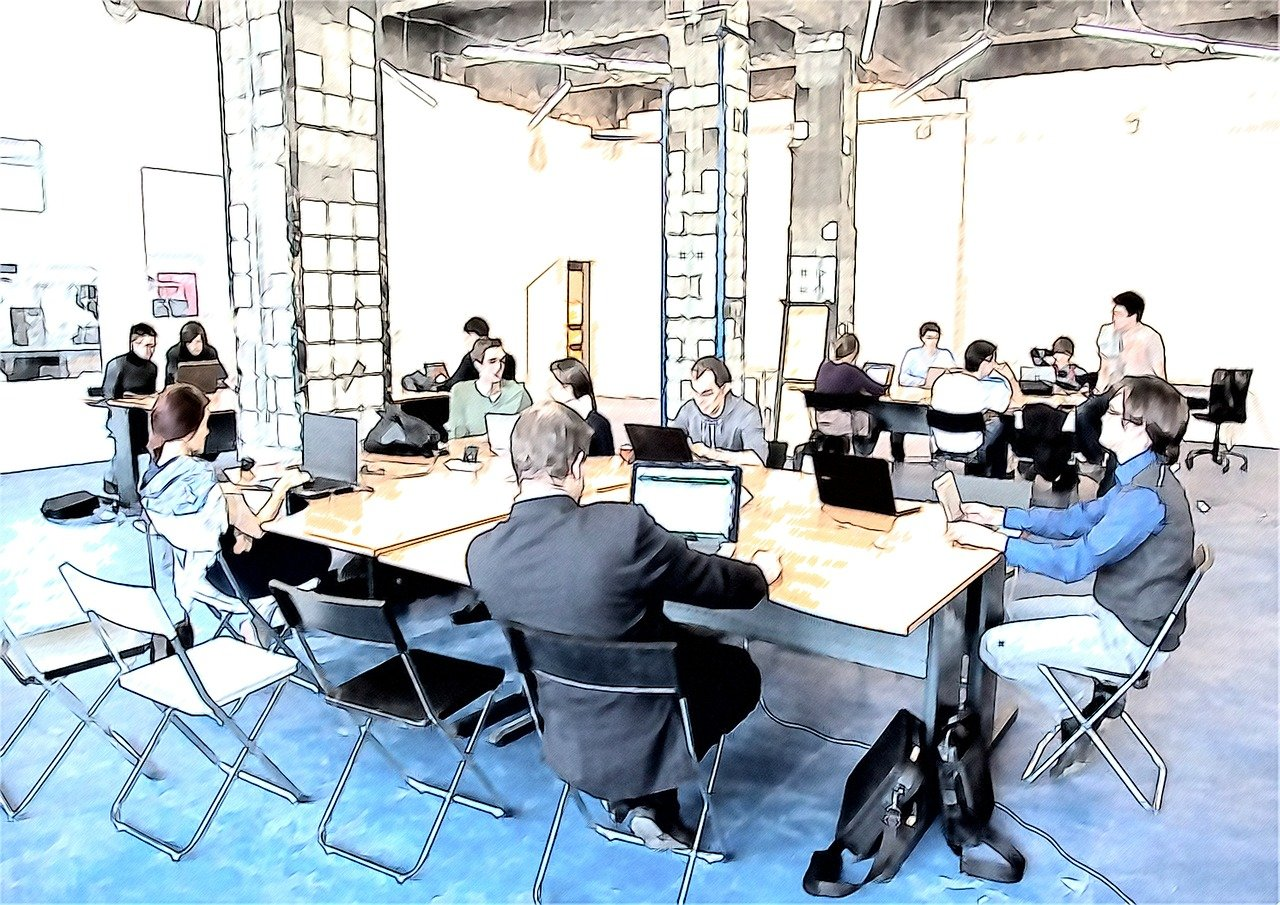

**Student Name: Wahalathanthri W.A.S** <br>
**Registration Number: EG/2020/4257** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [ ]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## Data Loading

In [ ]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
data = pd.read_csv('sample_data/Placement_Data_Full_Class.csv')

# Print the first five rows of the loaded dataframe

# Your code goes here
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
data.drop(columns=['sl_no'], inplace=True)

## Exploratory Data Analysis (EDA)

In [ ]:
# Identify the shape of the loaded dataframe

# Your code goes here
print("Shape of the dataframe:", data.shape)

Shape of the dataframe: (215, 14)


In [ ]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**

Categorical features: gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status

Numerical features: ssc_p, hsc_p, degree_p, etest_p, mba_p, salary

In [ ]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** When we visualize data for building models, it's important to only look at the part of the data that the model learns from. We do this to make sure our visualizations don't accidentally give the model hints about the answers it's supposed to predict. By focusing on just the training data, we can understand what the model learns without cheating by seeing the test data. This helps us build models that work well on new data we haven't seen before.

In [ ]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
X = data.drop(columns=['status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Print number of training data points

# Your code goes here
print("Number of training data points:", X_train.shape[0])

Number of training data points: 172


In [ ]:
# Print number of testing data points

# Your code goes here
print("Number of testing data points:", X_test.shape[0])

Number of testing data points: 43


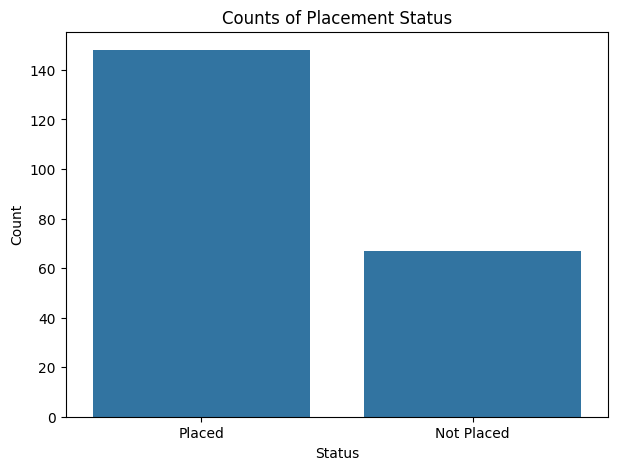

In [ ]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
plt.figure(figsize=(7, 5))
sns.countplot(x='status', data=data)
plt.title('Counts of Placement Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** Yes<br>
1. Biased Model Performance- Models may favor the majority class, leading to poor performance on the minority class.
2. Difficulty in Detecting Minority Class- Imbalanced datasets make it hard for models to accurately identify instances of the minority class, resulting in higher false negative rates.
3. Misinterpretation of Model Evaluation Metrics- Traditional metrics like accuracy can be misleading, as they don't reflect the true performance of the model on imbalanced data.



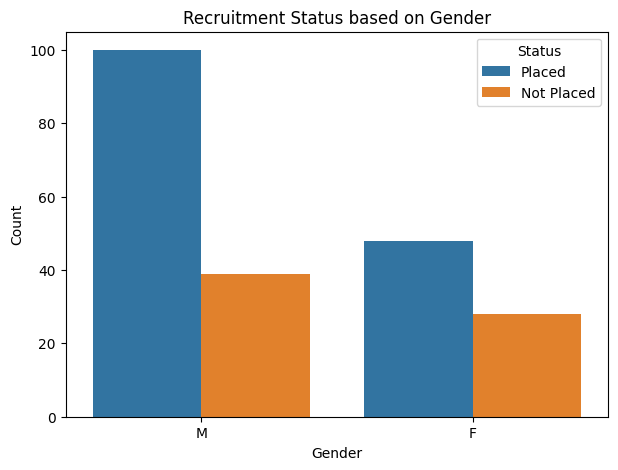

In [ ]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', hue='status', data=data)
plt.title('Recruitment Status based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

**Q:** Explain the observation from the above table.
> **A:**  This shows an imbalance in recruitment status between male and female applicants and it may affect the learning process of the model. If one class significantly outweighs the other in terms of representation, the model may become biased towards the majority class (male applicants) and struggle to accurately learn patterns from the minority class(female applicants). Also, model's performance may be skewed towards the male applicants due to the imbalance in the dataset. As a result, metrics such as accuracy may not accurately reflect the model's ability to generalize to unseen data, especially for the female applicants.

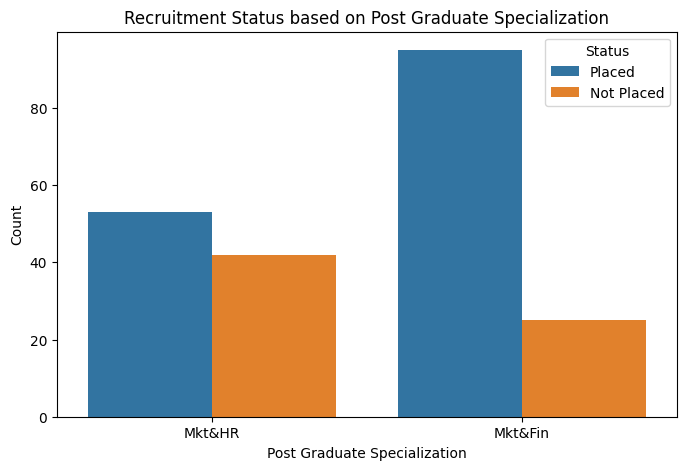

In [ ]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
plt.figure(figsize=(8, 5))
sns.countplot(x='specialisation', hue='status', data=data)
plt.title('Recruitment Status based on Post Graduate Specialization')
plt.xlabel('Post Graduate Specialization')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

**Q:** Inteprete the above results.
> **A:** The imbalance in recruitment status between different post-graduate specializations may impact model training. Imbalanced classes can bias the model towards the majority class (Mkt&Fin), leading to suboptimal performance for the minority class (Mkt&HR). And model may struggle to accurately learn patterns from the Mkt&HR, potentially resulting in lower predictive accuracy and biased decision boundaries. Further in test phase, model's performance may be skewed towards the Mkt&Fin due to class imbalance. As a result, evaluation metrics such as accuracy may not provide a complete picture of the model's effectiveness, especially for the Mkt&HR.

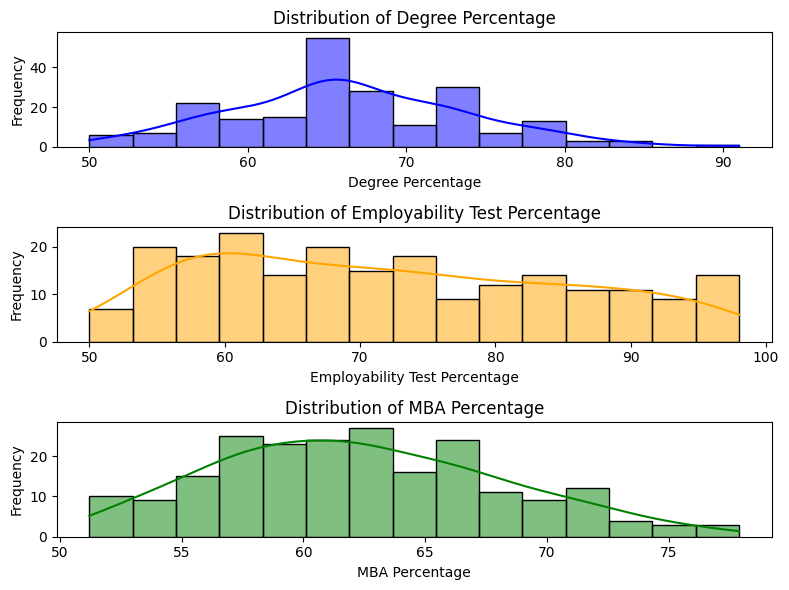

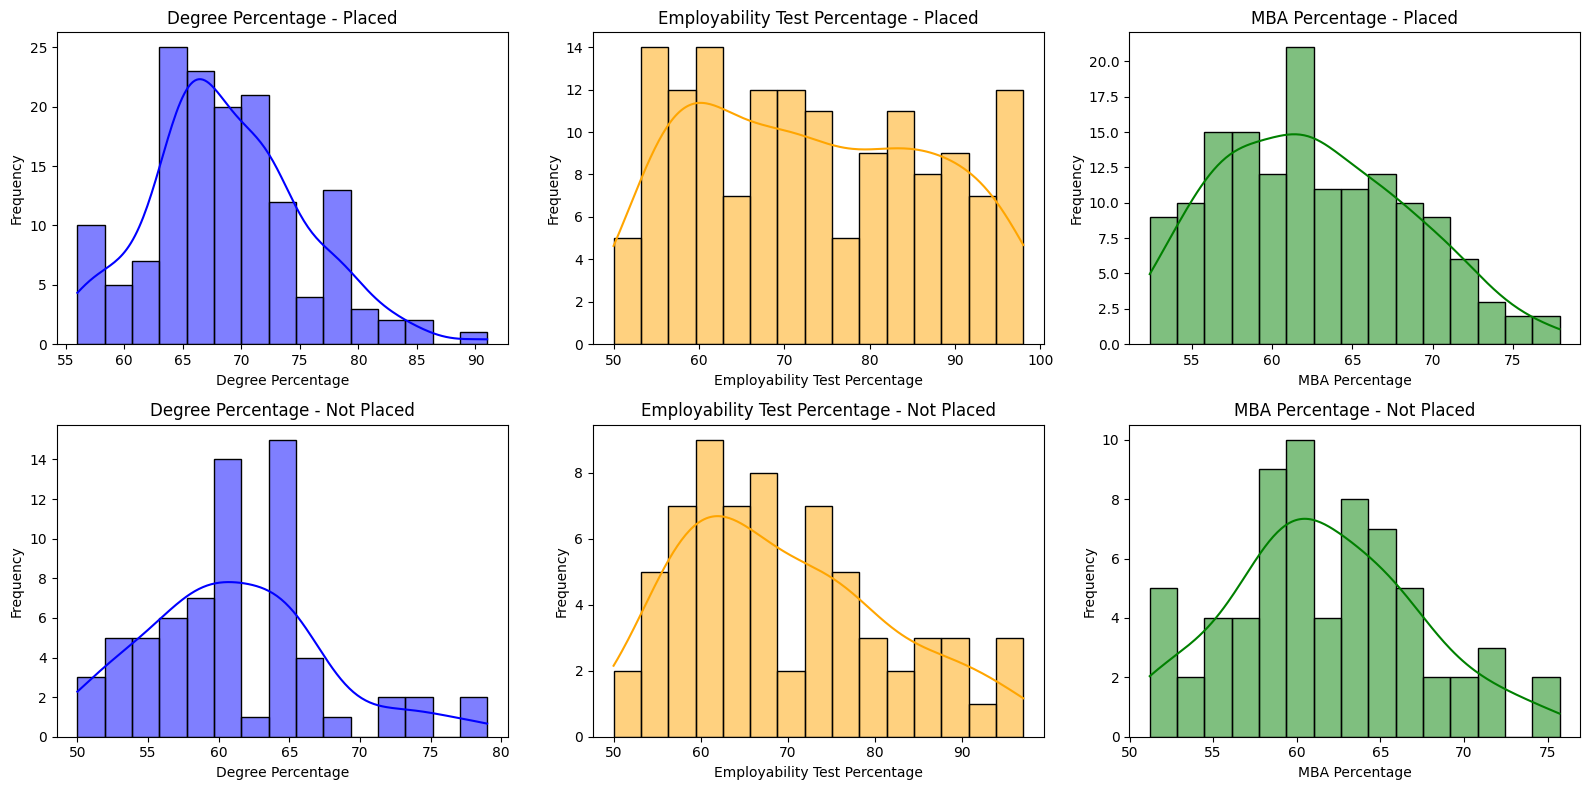

In [ ]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here
plt.figure(figsize=(8, 6))

# Degree percentage histogram
plt.subplot(3, 1, 1)
sns.histplot(data['degree_p'], bins=15, kde=True, color='blue')
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

# Employability test percentage histogram
plt.subplot(3, 1, 2)
sns.histplot(data['etest_p'], bins=15, kde=True, color='orange')
plt.title('Distribution of Employability Test Percentage')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

# MBA percentage histogram
plt.subplot(3, 1, 3)
sns.histplot(data['mba_p'], bins=15, kde=True, color='green')
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
plt.figure(figsize=(16, 8))

# Degree percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 1)
sns.histplot(data[data['status'] == 'Placed']['degree_p'], bins=15, kde=True, color='blue')
plt.title('Degree Percentage - Placed')
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(data[data['status'] == 'Not Placed']['degree_p'], bins=15, kde=True, color='blue')
plt.title('Degree Percentage - Not Placed')
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

# Employability test percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 2)
sns.histplot(data[data['status'] == 'Placed']['etest_p'], bins=15, kde=True, color='orange')
plt.title('Employability Test Percentage - Placed')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(data[data['status'] == 'Not Placed']['etest_p'], bins=15, kde=True, color='orange')
plt.title('Employability Test Percentage - Not Placed')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

# MBA percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 3)
sns.histplot(data[data['status'] == 'Placed']['mba_p'], bins=15, kde=True, color='green')
plt.title('MBA Percentage - Placed')
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(data[data['status'] == 'Not Placed']['mba_p'], bins=15, kde=True, color='green')
plt.title('MBA Percentage - Not Placed')
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Q:** Summarize the visualizations in the above six plots.<br>
> **A:** Unlike some methods sensitive to normality assumptions, SVM focuses on finding the optimal hyperplane separating classes regardless of the underlying distribution. So, in theory, skewness shouldn't drastically affect its performance.

When we consider degree percentage, distribution for recruited people is slightly right-skewed compared to the not recruited distribution. This means that there are a few more recruited people with higher degree percentages. However, the difference is not very large, so it is unlikely to have a major impact on your SVM classifier.

In employability test percentage, the distribution for recruited people is more right-skewed than the distribution for not recruited people. This means that there are more recruited people with higher employability test percentages. This could potentially bias the SVM classifier towards predicting that people with high employability test scores are more likely to be recruited, even if the overall relationship is weak.

And MBA percentage distribution for recruited people is slightly left-skewed compared to the not recruited distribution. This means that there are a few more recruited people with lower MBA percentages. However, the difference is not very large, so it is unlikely to have a major impact on the SVM classifier.


In [ ]:
# Check for the null values in train set

# Your code goes here
print("Null values in train set:")
X_train.isnull().sum()

Null values in train set:


gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            51
dtype: int64

In [ ]:
# Check for the null values in test set

# Your code goes here
print("Null values in test set:")
X_test.isnull().sum()

Null values in test set:


gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            16
dtype: int64

<Figure size 800x600 with 0 Axes>

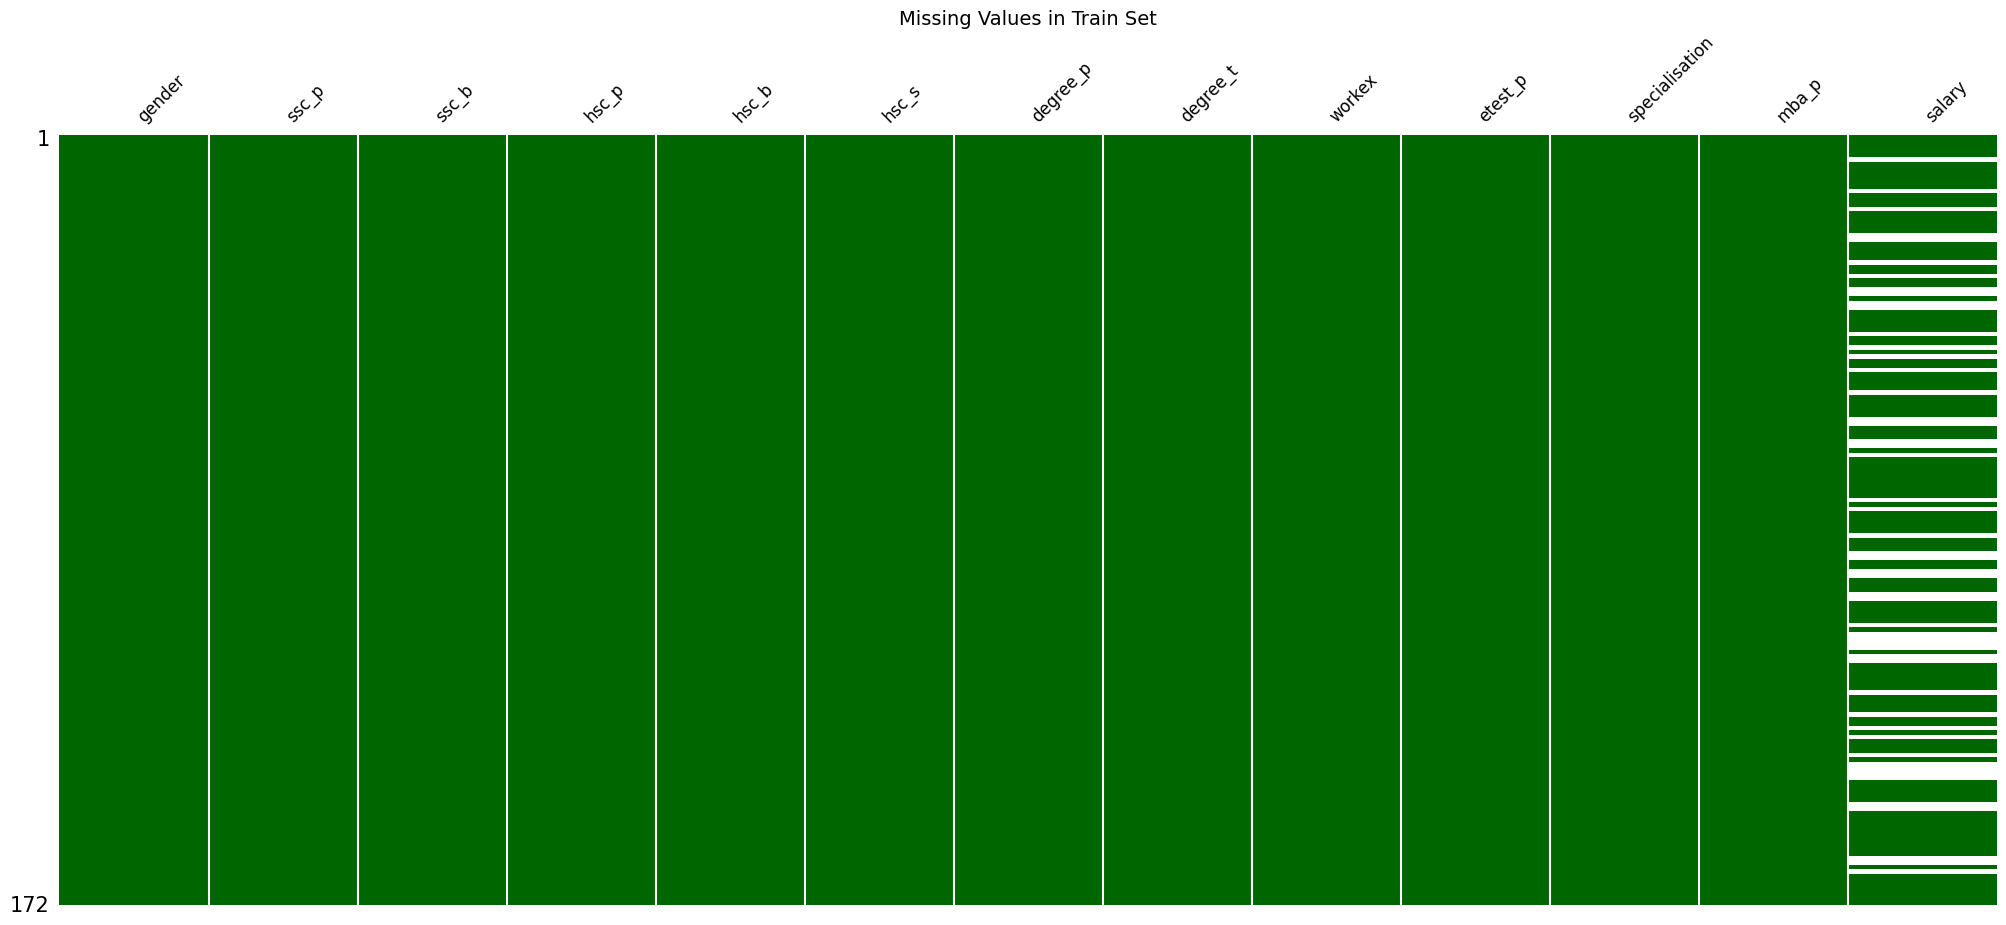

In [ ]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
plt.figure(figsize=(8, 6))
msno.matrix(X_train, fontsize=12, sparkline=False, color=(0.0, 0.4, 0.0))
plt.title('Missing Values in Train Set', fontsize=14)
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:** Imputing missing values with 0

Since the missing values in the "salary" column are likely due to instances where students were not placed (status = "Not Placed"), we can reasonably assume that these missing values represent cases where no salary information is available because the students were not placed in jobs. Therefore, we can impute these missing values with a placeholder value, such as 0, to indicate that no salary information is available for these instances.


In [ ]:
# Handle the missing data

# Your code goes here
X_train.loc[(y_train == 'Not Placed') & (X_train['salary'].isnull()), 'salary'] = 0

In [ ]:
# Test the training dataset after processing the null values

# Your code goes here
print("Null values in train set after processing:")
print(X_train.isnull().sum())

Null values in train set after processing:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [ ]:
# Process the null values in the test set

# Your code goes here
X_test.loc[(y_test == 'Not Placed') & (X_test['salary'].isnull()), 'salary'] = 0

In [ ]:
# Test the testing dataset after processing the null values

# Your code goes here
print("Null values in test set after processing:")
print(X_test.isnull().sum())

Null values in test set after processing:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:** One-hot encoding

Reason- One-hot encoding is preferred for categorical variable encoding in machine learning because it maintains categorical information while creating binary columns for each category. This method ensures compatibility with algorithms expecting numerical input and prevents bias by treating all categories equally during training.

Incorporate Methodology- In categorical feature handling, the process involves, identifying categorical features, applying one-hot encoding to convert them into binary columns, deciding whether to drop the first encoded column to prevent multicollinearity, and handling new categories in the test set. These steps ensure effective encoding for machine learning tasks.

In [ ]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# List the categorical features

# Your code goes here
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
encoder = make_column_transformer((OneHotEncoder(drop='first'), categorical_features), remainder='passthrough')

# Encode the training features

# Your code goes here
X_train_encoded = encoder.fit_transform(X_train)

In [ ]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train_encoded_df = pd.DataFrame(X_train_encoded)

print("Datatypes of the encoded training features:")
print(X_train_encoded_df.dtypes)

Datatypes of the encoded training features:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object


In [ ]:
# Encode the testing features

# Your code goes here
X_test_encoded = encoder.transform(X_test)
X_test_encoded_df = pd.DataFrame(X_test_encoded)

In [ ]:
# Encode the target variable in train and test sets

# Your code goes here
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Print the encoded labels for the training set

# Your code goes here
print("Encoded labels for the training set:")
print(y_train_encoded)

X_train_encoded_df.head()

Encoded labels for the training set:
[1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,66.2,65.60,60.00,62.54,300000.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,72.0,56.0,69.00,55.60,65.63,200000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66.5,66.8,69.30,80.40,71.00,236000.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,69.8,60.8,72.23,55.53,68.81,360000.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,69.0,62.0,69.00,67.00,62.35,240000.0


### Scale the Numerical Features

In [ ]:
# Standard Scale the numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
# Display the head of the scaled training set
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded_df.columns)
X_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.731925,-0.900292,-1.236694,0.921663,-0.828417,-0.234978,-0.595257,1.383927,-0.900292,-0.410629,-0.029691,-0.083279,-0.918486,0.051944,0.592696
1,-1.366260,-0.900292,0.808608,-1.084995,1.207122,-0.234978,-0.595257,-0.722581,1.110750,0.455692,-0.942427,0.368374,-1.242174,0.577092,-0.040102
2,-1.366260,-0.900292,-1.236694,-1.084995,-0.828417,-0.234978,-0.595257,1.383927,-0.900292,-0.073727,0.023999,0.408226,0.582249,1.489728,0.187706
3,-1.366260,1.110750,0.808608,-1.084995,1.207122,-0.234978,1.679947,-0.722581,1.110750,0.243924,-0.512904,0.797444,-1.247324,1.117536,0.972375
4,-1.366260,1.110750,0.808608,0.921663,-0.828417,-0.234978,-0.595257,1.383927,1.110750,0.166918,-0.405524,0.368374,-0.403528,0.019653,0.213017


In [ ]:
# Display the head of the scaled testing set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded_df.columns)
X_test_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.366260,-0.900292,-1.236694,0.921663,-0.828417,4.255715,-0.595257,-0.722581,1.110750,-0.025598,0.310348,-0.162983,1.141347,1.652881,-1.305698
1,-1.366260,-0.900292,-1.236694,-1.084995,1.207122,-0.234978,1.679947,-0.722581,1.110750,1.129497,0.847252,-0.083279,-1.065617,-1.149609,0.719256
2,-1.366260,1.110750,0.808608,-1.084995,1.207122,-0.234978,1.679947,1.383927,1.110750,1.610786,0.757768,0.368374,-0.771355,0.021353,0.023178
3,-1.366260,-0.900292,-1.236694,0.921663,-0.828417,-0.234978,-0.595257,1.383927,1.110750,-1.854498,-1.389847,-1.092857,-0.918486,-0.585372,-1.305698
4,0.731925,1.110750,0.808608,0.921663,-0.828417,-0.234978,-0.595257,1.383927,-0.900292,1.225755,1.205187,0.766891,-0.639673,0.646772,0.529416


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br> SMOTE (Synthetic Minority Over-sampling Technique) is a method for addressing class imbalance in machine learning datasets. It generates synthetic examples for the minority class by interpolating between existing instances and their nearest neighbors. This approach introduces diversity, mitigating overfitting and improving model performance on imbalanced datasets.

> **A2 (Advantage):** The primary advantage of SMOTE (Synthetic Minority Over-sampling Technique) over other oversampling methods is its ability to generate synthetic examples for the minority class. Unlike simple duplication methods, SMOTE creates diverse synthetic samples, reducing the risk of overfitting and improving generalization performance on imbalanced datasets.

In [ ]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
smote = SMOTE()

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)

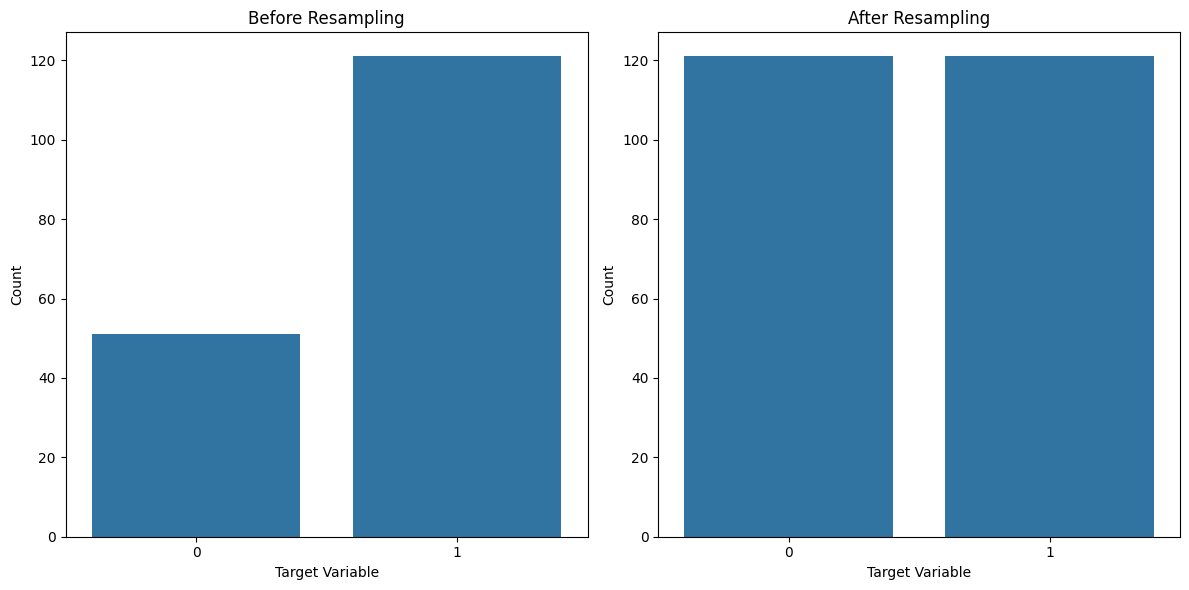

In [ ]:
# plot the count plots side by side before and after resampling

# Your code goes here
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot count plot for the original target variable
sns.countplot(x=y_train_encoded, ax=axes[0])
axes[0].set_title('Before Resampling')
axes[0].set_xlabel('Target Variable')
axes[0].set_ylabel('Count')

# Plot count plot for the target variable after resampling
sns.countplot(x=y_train_oversampled, ax=axes[1])
axes[1].set_title('After Resampling')
axes[1].set_xlabel('Target Variable')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:** Oversampling the testing set is not recommended in machine learning. While oversampling addresses class imbalance during training, oversampling the testing set can introduce data leakage and bias evaluation results. Testing data should reflect real-world scenarios, ensuring accurate assessment of model generalization without artificially inflated class representation.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [ ]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
svc_classifier = SVC()

svc_classifier.fit(X_train_oversampled, y_train_oversampled)

y_pred_svc = svc_classifier.predict(X_test_scaled)

In [ ]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
imbalanced_pipeline = make_pipeline(
    SMOTE(),
    SVC()
)

In [ ]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:** Stratified K-Fold cross-validation is vital for accurate model evaluation. By preserving class distribution in each fold, it ensures stable performance estimates, particularly in imbalanced datasets. This method reduces variance in performance metrics, providing reliable assessments of model generalization. Additionally, it prevents data leakage and ensures the preservation of specific data patterns during evaluation, enhancing the validity of results.

In [ ]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.01, 0.1, 1]
}

In [ ]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
grid_search = GridSearchCV(estimator=imbalanced_pipeline,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=skf,
                           verbose=2,
                           n_jobs=-1)

In [ ]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [ ]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
grid_search.best_score_

1.0

In [ ]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
grid_search.best_params_

{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}

In [ ]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_

### Model Evaluation

In [ ]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_scaled, y_train_encoded)

Pipeline(steps=[('smote', SMOTE()),
                ('svc', SVC(C=0.1, gamma=0.01, kernel='linear'))])

In [ ]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
accuracy = best_estimator.score(X_train_scaled, y_train_encoded)
print("Accuracy on the complete training set:", accuracy)

Accuracy on the complete training set: 1.0


In [ ]:
# Calculate the accuracy for the test set

# Your code goes here
accuracy_test = best_estimator.score(X_test_scaled, y_test_encoded)
print("Accuracy on the test set:", accuracy_test)

Accuracy on the test set: 1.0


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:** The fact that both the training and test accuracies are 1.0 (100%) raises suspicion about potential overfitting. While achieving high accuracy on the training set is desirable, perfect accuracy on both sets is uncommon and suggests that the model may have memorized the training data rather than learning general patterns that can be applied to unseen data.

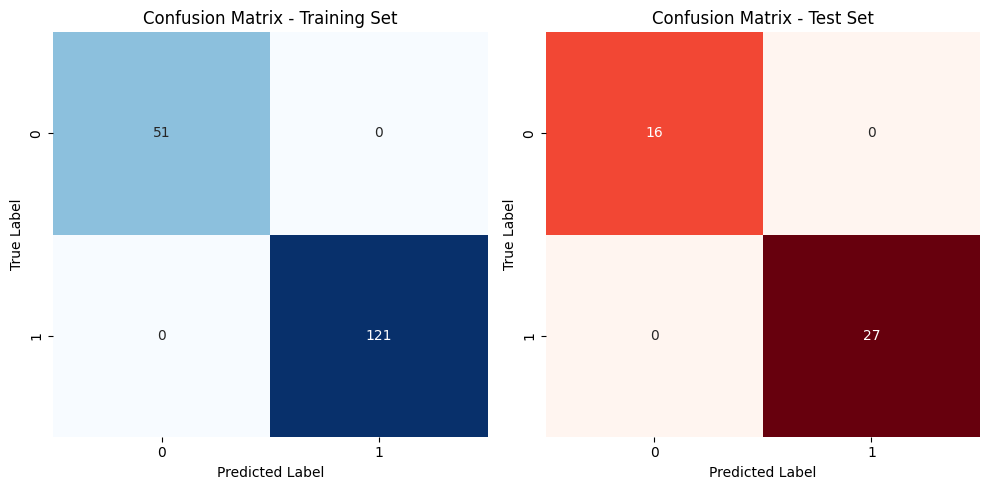

In [ ]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
y_train_pred = best_estimator.predict(X_train_scaled)
y_test_pred = best_estimator.predict(X_test_scaled)

conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

plt.figure(figsize=(10, 5))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

**Q:** Comment about the obtained confusion matrices. <br>
> **A:** The confusion matrices indicate the model's performance in classifying instances for both the training and testing sets. In both cases, there are no false positives or false negatives, indicating perfect classification performance. The model correctly identifies all instances of both positive and negative classes.

In [ ]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
classification_report_test = classification_report(y_test_encoded, y_test_pred)

print("Classification Report - Test Set:")
print(classification_report_test)

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        27

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:** In here, precision is 1.00 for both classes, indicating that all instances predicted as positive are indeed positive. Recall value of 1.00 for both classes indicates that the model correctly identifies all positive instances. And the F1-score of 1.00 for both classes indicates excellent balance between precision and recall. In report, support refers to the number of actual occurrences of each class in the test set. For class 0, the support is 16, indicating there are 16 instances of class 0 in the test set. And for class 1, the support is 27.

Also, as report gives, with an accuracy of 1.00, the model correctly classifies all instances. Macro average calculates the average of the metrics (precision, recall, F1-score) for each class without considering class imbalance. In this case, the macro average for precision, recall, and F1-score is 1.00, indicating perfect performance across all classes. And Weighted average calculates the average of the metrics (precision, recall, F1-score) for each class, weighted by the support of each class. In this case, the weighted average for precision, recall, and F1-score is also 1.00, indicating perfect performance across all classes.

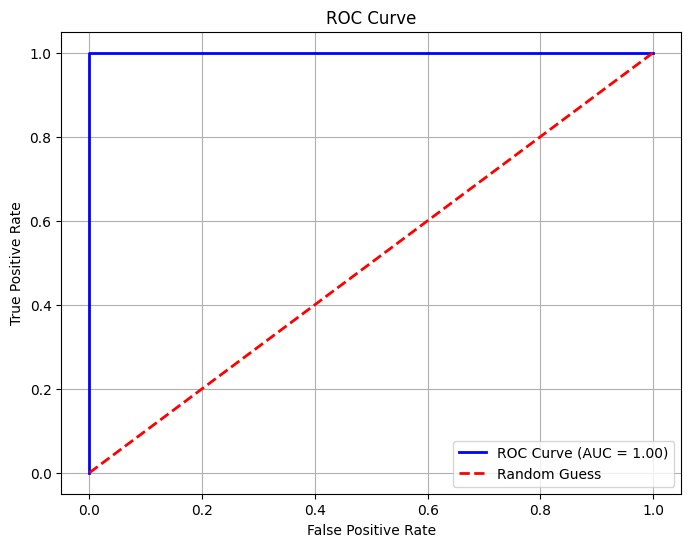

Area Under the Curve (AUC): 1.00


In [ ]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_pred)

# Calculate AUC (Area Under the Curve) for the ROC curve
auc = roc_auc_score(y_test_encoded, y_test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print("Area Under the Curve (AUC): {:.2f}".format(auc))

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:** The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds. The AUC value quantifies the overall performance of a binary classification model represented by the ROC curve. In this case, an AUC value of 1.00 suggests that the model has achieved optimal performance. This implies that the model has correctly classified all positive instances while avoiding false positives. Also, ROC curve forms a diagonal line from the bottom-left corner to the top-right corner of the plot, it means that the model perfectly separates the positive and negative instances.

Based on the obtained ROC curve and AUC value, we can conclude that the estimator has a exceptional discriminatory power and demostrate a excellent classification performance. And it exhibits outstanding accuracy and reliability for the classification task, making it highly effective in distinguishing between classes and producing accurate predictions.